In [489]:
import pandas as pd

In [490]:
df_train = pd.read_csv(r"C:\Users\ASUS\Documents\Learn ML\Titanic\train.csv")
df_test = pd.read_csv(r"C:\Users\ASUS\Documents\Learn ML\Titanic\test.csv")
df_sample_submission = pd.read_csv(r"C:\Users\ASUS\Documents\Learn ML\Titanic\gender_submission.csv")

In [491]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [492]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [493]:
df_train.shape

(891, 12)

In [494]:
df_test.shape

(418, 11)

In [495]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [496]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Melihat Distibusi nilai Null setiap kolom

In [497]:
print(df_train.isnull().sum())
print("--------------------")
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


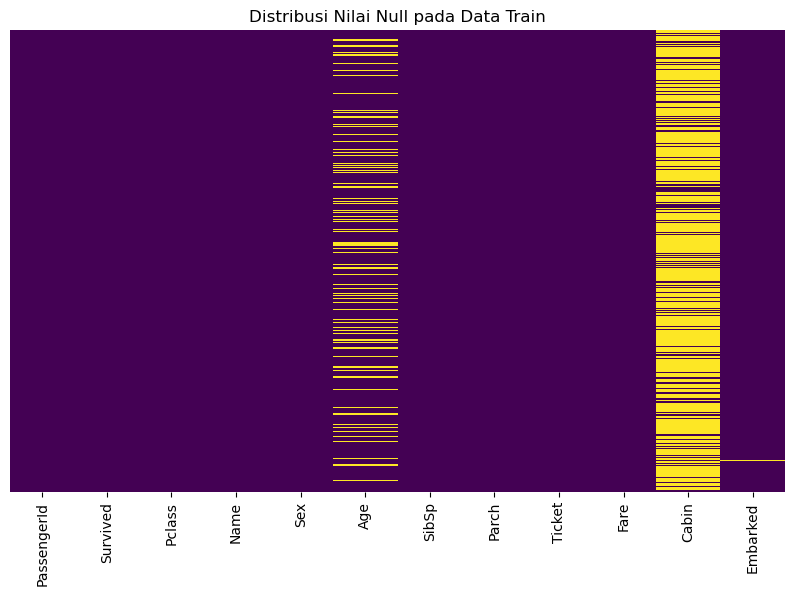

In [498]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Distribusi Nilai Null pada Data Train')
plt.show()

Text(0.5, 1.0, 'Distribusi nilai Null pada Data Test')

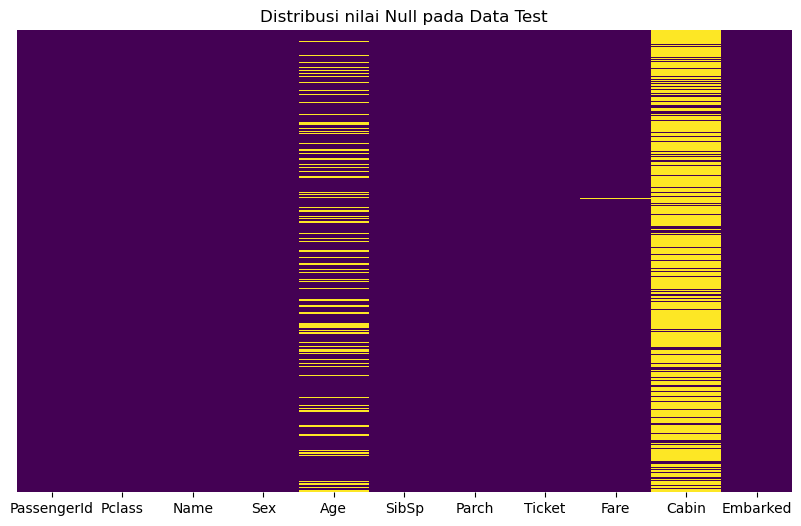

In [499]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_test.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Distribusi nilai Null pada Data Test")

Drop kolom Cabin karena memiliki banyak nilai null

In [500]:
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

In [501]:
df_train.shape

(891, 11)

In [502]:
df_test.shape

(418, 10)

Mengisi nilai null pada kolom Embarked (Data Train) dan kolom Fare (Data test)

In [503]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [504]:
rows_with_embarked_null = df_train[df_train['Embarked'].isnull()]
rows_with_embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Ganti nilai null pada kolom Embarked (Data Train) dengan modus

In [505]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [506]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41464\3833210086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [507]:
row61 = df_train.loc[61]
row829 = df_train.loc[829]

df_embarked_null = pd.concat([row61, row829], axis=1)
df_embarked_null


,61,829
PassengerId,62,830
Survived,1,1
Pclass,1,1
Name,"Icard, Miss. Amelie","Stone, Mrs. George Nelson (Martha Evelyn)"
Sex,female,female
Age,38.0,62.0
SibSp,0,0
Parch,0,0
Ticket,113572,113572
Fare,80.0,80.0


In [508]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


Ganti nilai null pada kolom Fare (Data test)

In [509]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


c:\Users\ASUS\anaconda3\envs\MlProject\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


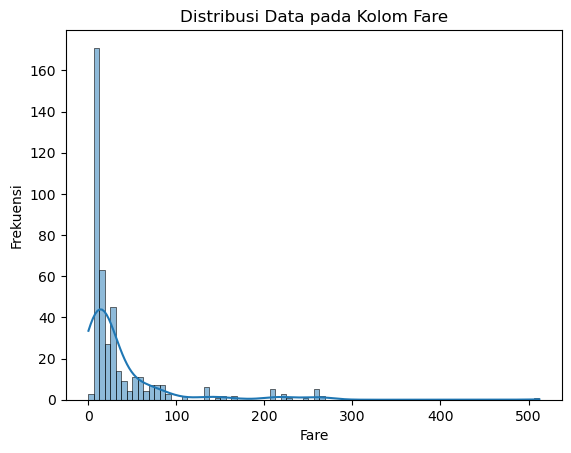

In [510]:
sns.histplot(df_test['Fare'], kde=True)
plt.title('Distribusi Data pada Kolom Fare')
plt.xlabel('Fare')
plt.ylabel('Frekuensi')
plt.show()

In [511]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [512]:
rows_with_fare_null = df_test[df_test['Fare'].isnull()]
rows_with_fare_null

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


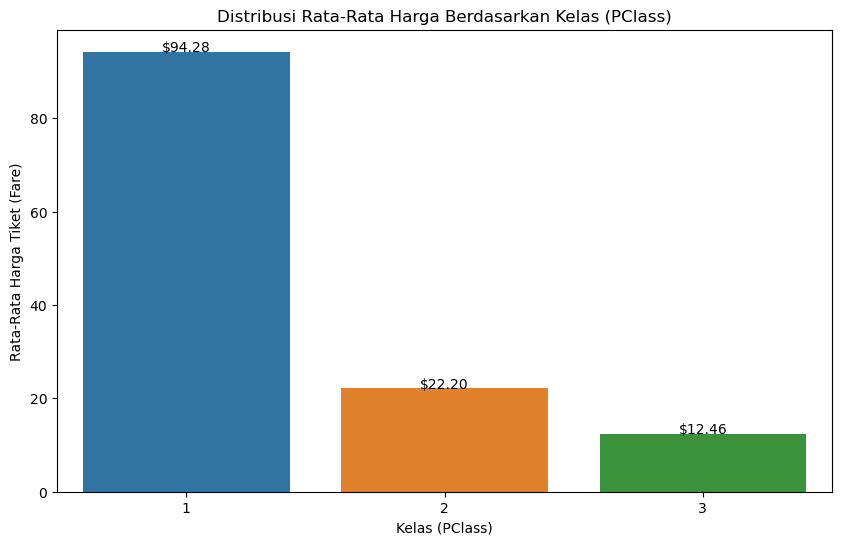

In [513]:
avg_fare_by_class = df_test.groupby('Pclass')['Fare'].mean().reset_index()

# avg_fare_by_class

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Fare', data=avg_fare_by_class)
plt.title('Distribusi Rata-Rata Harga Berdasarkan Kelas (PClass)')
plt.xlabel('Kelas (PClass)')
plt.ylabel('Rata-Rata Harga Tiket (Fare)')
for index, row in avg_fare_by_class.iterrows():
    plt.text(row.name, row['Fare'], f"${row['Fare']:.2f}", color='black', ha="center")
plt.show()

Ganti nilai null pada kolom Fear (Data Test) dengan Rata2 Fear pada Pclass 3

In [514]:
avg_fare_3rd_class = df_test[df_test['Pclass'] == 3]['Fare'].mean()
df_test['Fare'].fillna(avg_fare_3rd_class, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41464\1950990894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(avg_fare_3rd_class, inplace=True)


In [515]:
df_test.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                    12.459678
Embarked                        S
Name: 152, dtype: object

In [516]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


Buat kolom baru untuk mengidentifikasi title/gelar passenger guna mengisi nilai Age yang kosong dengan rata2 age setiap title (Mr, Mrs, etc....)

In [517]:
df_train['Title'] = df_train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df_test['Title'] = df_test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [518]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [519]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [520]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [521]:
print(df_train['Title'][df_train.duplicated()].empty)
print(df_test['Title'][df_test.duplicated()].empty)

True
True


In [522]:
rows_with_age_null_train = df_train[df_train['Age'].isnull()]
rows_with_age_null_test = df_test[df_test['Age'].isnull()]

In [523]:
rows_with_age_null_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S,Mr


In [524]:
rows_with_age_null_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S,Mr
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S,Mrs
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C,Mr
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S,Mrs
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q,Miss
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q,Miss
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,Mr


In [525]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [526]:
df_test['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [527]:
avg_age_by_title_train = rows_with_age_null_train.groupby('Title')['Age'].mean().reset_index()
avg_age_by_title_test = rows_with_age_null_test.groupby('Title')['Age'].mean().reset_index()

In [528]:
title_train = avg_age_by_title_train['Title']
list_mean_title_train = []
for title in title_train:
    list_mean_title_train.append(df_train[df_train['Title'] == title]['Age'].mean())


title_test = avg_age_by_title_test['Title']
list_mean_title_test = []
for title in title_test:
    list_mean_title_test.append(df_test[df_test['Title'] == title]['Age'].mean())

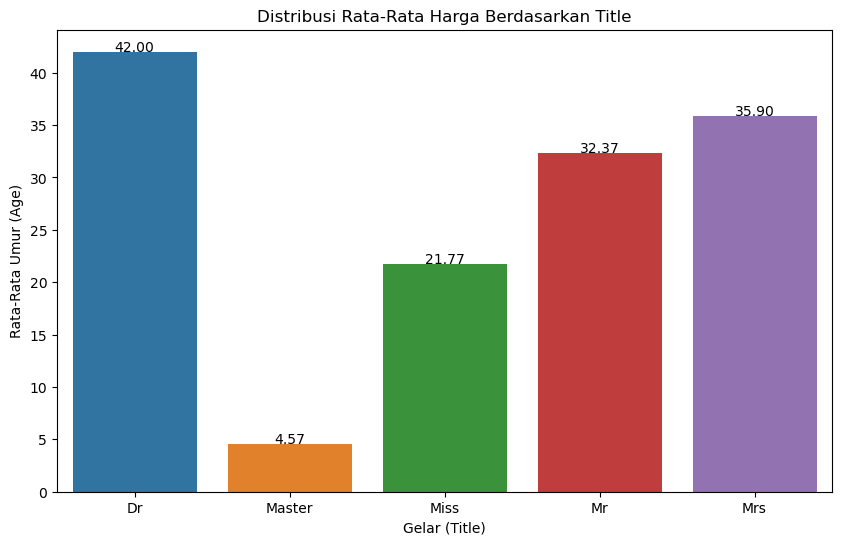

In [529]:
#Train
title_train_df = pd.DataFrame(title_train, columns=['Title'])
list_mean_title_train_df = pd.DataFrame(list_mean_title_train, columns=['Age'])

avg_age_by_title_train = pd.concat([title_train_df, list_mean_title_train_df], axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_age_by_title_train['Title'], y=list_mean_title_train)
plt.title('Distribusi Rata-Rata Harga Berdasarkan Title')
plt.xlabel('Gelar (Title)')
plt.ylabel('Rata-Rata Umur (Age)')
for index, row in avg_age_by_title_train.iterrows():
    plt.text(index, row['Age'], f"{row['Age']:.2f}", color='black', ha="center")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


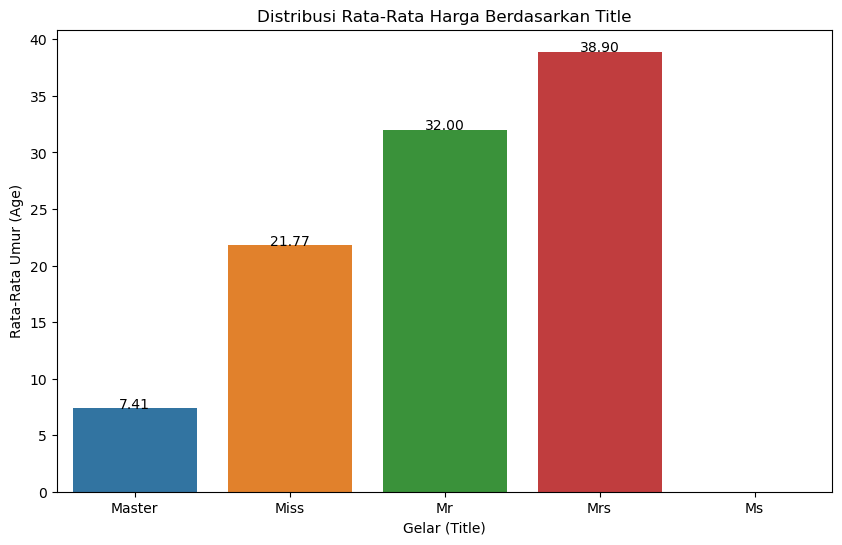

In [530]:
#test
title_test_df = pd.DataFrame(title_test, columns=['Title'])
list_mean_title_test_df = pd.DataFrame(list_mean_title_test, columns=['Age'])

avg_age_by_title_test = pd.concat([title_test_df, list_mean_title_test_df], axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_age_by_title_test['Title'], y=list_mean_title_test)
plt.title('Distribusi Rata-Rata Harga Berdasarkan Title')
plt.xlabel('Gelar (Title)')
plt.ylabel('Rata-Rata Umur (Age)')
for index, row in avg_age_by_title_test.iterrows():
    plt.text(index, row['Age'], f"{row['Age']:.2f}", color='black', ha="center")
plt.show()

Pada kolom age pada data test di title 'Ms' memiliki nilai null dan hanya memiliki 1 row. Jadi disini kita menggantinya dengan nilai Rata-Rata age pada title 'Ms' pada Data Train

In [531]:
age_title_inTrain = df_train[df_train['Title'] == 'Ms']
age_title_inTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,S,Ms


In [532]:
df_test['Age'].fillna(age_title_inTrain['Age'].mean(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41464\3506146904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(age_title_inTrain['Age'].mean(), inplace=True)


In [533]:
df_test[df_test['Title'] == 'Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,28.0,0,0,364856,7.75,Q,Ms


Mengisi nilai null pada kolom Age pada Data Train dan Data Test

In [534]:
#Data Train
titles_train = list(title_train)
titles_test = list(title_test)

title_test = title_test[:-1]
list_mean_title_test = list_mean_title_test[:-1]

for i in range(len(list_mean_title_train)):
    df_train.loc[df_train['Title'] == titles_train[i], 'Age'] = df_train.loc[df_train['Title'] == titles_train[i], 'Age'].fillna(list_mean_title_train[i])      

In [535]:
#Data Test
for i in range(len(list_mean_title_test)):
    df_test.loc[df_test['Title'] == titles_test[i], 'Age'] = df_test.loc[df_test['Title'] == titles_test[i], 'Age'].fillna(list_mean_title_test[i])      

In [536]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [537]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Drop kolom PassengerId, Name, Ticket, Title pada Data Train dan Test

In [538]:
df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Title'], inplace=True)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Title'], inplace=True)

In [539]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [540]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [541]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

coding_colums = ["Sex","Embarked"]
for code in coding_colums:
  df_train[code] = encoder.fit_transform(df_train[code]) 
  df_test[code] = encoder.fit_transform(df_test[code]) 

In [542]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [593]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


Modelling

Menggunakan RandomForest

In [594]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [647]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [648]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

r_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

pipelineRF = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', r_forest)  # Model SVM
])

pipelineRF.fit(X_train, y_train)

predictions = pipelineRF.predict(X_test)

accuracyRF = accuracy_score(y_test, predictions)

print("Akurasi model Random Forest:", accuracyRF)

Akurasi model Random Forest: 0.8444444444444444


Menggunakan cross-validation

In [689]:
# from sklearn.model_selection import cross_val_score
# score = cross_val_score(r_forest, X, y, cv=4)
# score_ =sum(score)/len(score)
# print(f'Average Accuaracy for Random Forest (using validation score): {score_}')

Average Accuaracy for Random Forest (using validation score): 0.822688159011029


Menggunakan Logistic Regression

In [650]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

pipelineLR = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', logistic_regression)  # Model SVM
])

pipelineLR.fit(X_train, y_train)

predictions = pipelineLR.predict(X_test)

accuracylr = accuracy_score(y_test, predictions)

print("Akurasi model Logistic Regression:", accuracylr)

Akurasi model Logistic Regression: 0.8555555555555555


SVM kernel Linear

In [664]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')

pipeline = Pipeline([
    ('svm', svm_linear)  # Model SVM
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

accuracySVM_linear = accuracy_score(y_test, predictions)

print("Akurasi model SVM (kernel linier):", accuracySVM_linear)

Akurasi model SVM (kernel linier): 0.8111111111111111


SVM kernel RBF tanpa Scaler

In [652]:
# Inisialisasi model SVM dengan kernel RBF
svm_model = SVC(kernel='rbf')

# Inisialisasi pipeline tanpa normalisasi/scaler
pipeline_no_scaling = Pipeline([
    ('svm', svm_model)  # Model SVM
])

# Latih model menggunakan data train melalui pipeline
pipeline_no_scaling.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions_no_scaling = pipeline_no_scaling.predict(X_test)

# Hitung akurasi dari prediksi
accuracy_no_scaling = accuracy_score(y_test, predictions_no_scaling)

print("Akurasi model SVM (kernel RBF) tanpa scaler:", accuracy_no_scaling)

Akurasi model SVM (kernel RBF) tanpa scaler: 0.6888888888888889


Menggunakan SVM kernel RBF dengan Normalisasi

In [667]:
# Inisialisasi model SVM dengan kernel linier
svm_model = SVC(kernel='rbf')

# Inisialisasi pipeline dengan normalisasi data dan model SVM
pipelineNormalization = Pipeline([
    ('scaler', MinMaxScaler()),  # Normalisasi data
    ('svm', svm_model)  # Model SVM
])

# Latih model menggunakan data train melalui pipeline
pipelineNormalization.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipelineNormalization.predict(X_test)

# Hitung akurasi dari prediksi
accuracySVM_rbf = accuracy_score(y_test, predictions)

print("Akurasi model SVM (kernel linier) dengan pipeline normalisasi:", accuracySVM_rbf)

Akurasi model SVM (kernel linier) dengan pipeline normalisasi: 0.8333333333333334


Model KNN dengan Normalisasi

In [654]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Inisialisasi pipeline dengan normalisasi data dan model KNN
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Normalisasi data
    ('knn', knn_model)  # Model KNN
])

# Latih model menggunakan data train melalui pipeline
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipeline.predict(X_test)

# Hitung akurasi dari prediksi
accuracyKNN = accuracy_score(y_test, predictions)

print("Akurasi model KNN dengan pipeline normalisasi:", accuracyKNN)

Akurasi model KNN dengan pipeline normalisasi: 0.8111111111111111


Model Decision Tree

In [655]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()

# Inisialisasi pipeline dengan normalisasi data dan model Decision Tree
pipeline = Pipeline([
    ('dt', dt_model)  # Model Decision Tree
])

# Latih model menggunakan data train melalui pipeline
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipeline.predict(X_test)

# Hitung akurasi dari prediksi
accuracyDT = accuracy_score(y_test, predictions)

print("Akurasi model Decision Tree dengan pipeline:", accuracyDT)

Akurasi model Decision Tree dengan pipeline: 0.8111111111111111


Model Naive Bayes

In [656]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Inisialisasi pipeline dengan normalisasi data dan model Naive Bayes
pipeline = Pipeline([
    ('nb', nb_model)  # Model Naive Bayes
])

# Latih model menggunakan data train melalui pipeline
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipeline.predict(X_test)

# Hitung akurasi dari prediksi
accuracyNB = accuracy_score(y_test, predictions)

print("Akurasi model Naive Bayes dengan pipeline:", accuracyNB)

Akurasi model Naive Bayes dengan pipeline: 0.7888888888888889


Model Gradient Boosting

In [687]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Inisialisasi pipeline dengan normalisasi data dan model Gradient Boosting
pipeline = Pipeline([
    ('gb', gb_model)  # Model Gradient Boosting
])

# Latih model menggunakan data train melalui pipeline
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipeline.predict(X_test)

# Hitung akurasi dari prediksi
accuracyGB = accuracy_score(y_test, predictions)

print("Akurasi model Gradient Boosting:", accuracyGB)

Akurasi model Gradient Boosting: 0.8333333333333334


Model Neural Network

In [658]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=1)

# Inisialisasi pipeline dengan normalisasi data dan model Neural Network
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisasi data
    ('nn', nn_model)  # Model Neural Network
])

# Latih model menggunakan data train melalui pipeline
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data test melalui pipeline
predictions = pipeline.predict(X_test)

# Hitung akurasi dari prediksi
accuracyNN = accuracy_score(y_test, predictions)

print("Akurasi model Neural Network dengan pipeline normalisasi:", accuracyNN)

Akurasi model Neural Network dengan pipeline normalisasi: 0.8333333333333334


Accuracies All Model

In [661]:
accuracies = {
    'Models': ['Random Forest', 'Logistic Regression', 'SVM Linear', 'SVM RBF', 'Decision Tree',  'Gradient Boosting', 'K-Nearest Neighbor', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [accuracyRF, accuracyLR, accuracySVM_linear, accuracySVM_rbf, accuracyDT, accuracyGB, accuracyKNN, accuracyNB, accuracyNN]
}

models = pd.DataFrame(accuracies)
models = models.sort_values(by='Accuracy', ascending=False)
models

,Models,Accuracy
1,Logistic Regression,0.855556
0,Random Forest,0.844444
3,SVM RBF,0.833333
5,Gradient Boosting,0.833333
8,Neural Network,0.833333
2,SVM Linear,0.811111
4,Decision Tree,0.811111
6,K-Nearest Neighbor,0.811111
7,Naive Bayes,0.788889


Prediksi data baru (Data Train) dan convert ke file csv

In [686]:
predictions_new_data = r_forest.predict(df_test)
predictions_df = pd.DataFrame({'PassengerId': df_sample_submission['PassengerId'], 'Survived': predictions_new_data})

predictions_df.to_csv('predictions.csv', index=False)